In [ ]:
import sys
!{sys.executable} -m pip install --user scikit-allel

In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.8


## VCF to HDF5

In [2]:
allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Csativa/vcf_filtering/raw_SNP_random.vcf.gz', '/users/mcevoysu/scratch/output/Csativa/scikit-allel/raw_SNP_random.h5', fields='*')

## Get data

In [3]:
callset_var_fn = '/users/mcevoysu/scratch/output/Csativa/scikit-allel/raw_SNP_random.h5'
callset_var = h5py.File(callset_var_fn, mode='r')

In [4]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [5]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

## Make datasets

In [6]:
variants = allel.VariantChunkedTable(callset_var['variants'])
variants

<VariantChunkedTable shape=(250287,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=42.7M cbytes=9.3M cratio=4.6
   values=h5py._hl.group.Group>

In [7]:
variants_np = variants[:]
rawsnps = variants_np.query('(is_snp == True)')
rawsnps

<VariantTable shape=(169324,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([200,  -1,  -1], [0.317,   nan,   nan], [b'T', b'', b''], 630,    nan, b'Chr01',   353, -1,   0.    , False, False,  0.   , b'.',  0.3911, [625,  -1,  -1], [0.98 ,   nan,   nan], 60.  ,    nan,   368469, 25.36,  17926.6 , [-1, -1], b'C',    nan, 11.189, [0, 0, 0],  True, 1)
 ([252,  -1,  -1], [0.39 ,   nan,   nan], [b'G', b'', b''], 644,    nan, b'Chr01',   472, -1,   0.    , False, False,  0.   , b'.',  0.4179, [630,  -1,  -1], [0.966,   nan,   nan], 60.  ,    nan,   368492, 28.73,  26211.8 , [-1, -1], b'T',    nan, 12.008, [0, 0, 0],  True, 1)
 ([258,  -1,  -1], [0.398,   nan,   nan], [b'A', b'', b''], 646,    nan, b'Chr01',   514, -1,   0.    , False, False,  0.   , b'.',  0.4234, [636,  -1,  -1], [0.972,   nan,   nan], 60.  ,    nan,   368498, 30.97,  27822.8 , [-1, -1], b'T',    nan, 12.132, [0, 0, 0],  True, 1)
 ...
 ([307,  -1,  -1], [0.471,   nan,   nan], [b'T', b'', b''], 648,  0.   , b'Chr12',  6131, -1,   0.    , False, False,  0.   , b'.',  0.2284, [324,  -1,  -1], [0.494,   nan,   nan], 60.  ,  0.   , 49180333, 27.34, 102641.  , [-1, -1], b'C',  0.203,  1.104, [0, 0, 0],  True, 1)
 ([ 31,  -1,  -1], [0.047,   nan,   nan], [b'A', b'', b''], 648, -0.971, b'Chr12', 13996, -1,   3.2612, False, False,  5.83 , b'.',  0.0044, [ 23,  -1,  -1], [0.035,   nan,   nan], 56.85, -6.038, 49180371,  0.59,    733.91, [-1, -1], b'G', -3.127,  0.277, [0, 0, 0],  True, 1)
 ([200,  -1,  -1], [0.306,   nan,   nan], [b'A', b'', b''], 648, -2.953, b'Chr12', 18370, -1, 160.    , False, False, 22.307, b'.', -0.4427, [202,  -1,  -1], [0.308,   nan,   nan], 56.92, -5.375, 49180437,  6.78,  89767.1 , [-1, -1], b'T', -1.578,  0.133, [0, 0, 0],  True, 1)]

In [8]:
notsnp = variants_np.query('(is_snp != True)')
notsnp

<VariantTable shape=(80963,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([  2,  -1,  -1], [0.003049,      nan,      nan], [b'*', b'', b''], 648,   nan, b'Chr01', 16775, -1, 0.0067,  True, False,   0.   , b'.', 0.2416, [  2,  -1,  -1], [0.003049,      nan,      nan],   nan, nan,   368909, 0., 0., [-1, -1], b'T',    nan, 0.836, [-1,  0,  0], False, 1)
 ([ 11,  -1,  -1], [0.017   ,      nan,      nan], [b'*', b'', b''], 648, 0.632, b'Chr01',  6277, -1, 0.3795,  True, False, 125.623, b'.', 0.1103, [ 10,  -1,  -1], [0.015   ,      nan,      nan], 60.  ,  0.,   492583, 0., 0., [-1, -1], b'T',  0.207, 4.503, [-1,  0,  0], False, 1)
 ([ 11,  -1,  -1], [0.017   ,      nan,      nan], [b'*', b'', b''], 648,   nan, b'Chr01',  6254, -1, 0.3819,  True, False, 142.202, b'.', 0.1396, [ 10,  -1,  -1], [0.015   ,      nan,      nan],   nan, nan,   492584, 0., 0., [-1, -1], b'G',    nan, 5.889, [-1,  0,  0], False, 1)
 ...
 ([189,  -1,  -1], [0.291   ,      nan,      nan], [b'*', b'', b''], 648,   nan, b'Chr12',  5697, -1, 0.    ,  True, False,   0.   , b'.', 0.2673, [200,  -1,  -1], [0.305   ,      nan,      nan], 60.  ,  0., 49180318, 0., 0., [-1, -1], b'G', -0.164, 2.647, [-1,  0,  0], False, 1)
 ([188,  -1,  -1], [0.29    ,      nan,      nan], [b'*', b'', b''], 648,   nan, b'Chr12',  5700, -1, 0.    ,  True, False,   0.   , b'.', 0.2703, [199,  -1,  -1], [0.303   ,      nan,      nan],   nan, nan, 49180319, 0., 0., [-1, -1], b'A',    nan, 2.663, [-1,  0,  0], False, 1)
 ([188,  -1,  -1], [0.29    ,      nan,      nan], [b'*', b'', b''], 648, 0.14 , b'Chr12',  5698, -1, 0.    ,  True, False,   0.   , b'.', 0.2719, [199,  -1,  -1], [0.303   ,      nan,      nan], 59.92,  0., 49180320, 0., 0., [-1, -1], b'T',  0.168, 2.669, [-1,  0,  0], False, 1)]

## Plot function

In [9]:
def plot_hist(f, dsubset='', bins=30, ):
    if dsubset == 'var':
        x = variants[f][:]
        l = 'Variant'
    elif dsubset == 'snp':
        x = rawsnps[f][:]
        l = 'Raw SNP'
    elif dsubset == 'notsnp':
        x = notsnp[f][:]
        l = 'Raw Not SNP'
    elif dsubset == 'biallelic':
        x = biallelic_np[f][:]
        l = 'Biallelic SNP'
    elif dsubset == 'varsel':
        x = var_selection[f][:]
        l = 'Filtered Variants'
    elif dsubset == 'snpsel':
        x = snp_selection[f][:]
        l = 'Filtered SNP'
    else:
        x = bi_selection[f][:]
        l = 'Biallelic SNP'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))

## Find Biallelic SNPS

In [10]:
numalt = rawsnps['numalt']
np.max(numalt)

3

In [11]:
count_numalt = np.bincount(numalt)
count_numalt

array([     0, 166629,   2648,     47])

In [12]:
n_multiallelic = np.sum(count_numalt[2:])
n_multiallelic

2695

In [13]:
filter_expression = '(numalt == 1)'
biallelic_np = rawsnps.query(filter_expression)[:]
biallelic_np

<VariantTable shape=(166629,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([200,  -1,  -1], [0.317,   nan,   nan], [b'T', b'', b''], 630,    nan, b'Chr01',   353, -1,   0.    , False, False,  0.   , b'.',  0.3911, [625,  -1,  -1], [0.98 ,   nan,   nan], 60.  ,    nan,   368469, 25.36,  17926.6 , [-1, -1], b'C',    nan, 11.189, [0, 0, 0],  True, 1)
 ([252,  -1,  -1], [0.39 ,   nan,   nan], [b'G', b'', b''], 644,    nan, b'Chr01',   472, -1,   0.    , False, False,  0.   , b'.',  0.4179, [630,  -1,  -1], [0.966,   nan,   nan], 60.  ,    nan,   368492, 28.73,  26211.8 , [-1, -1], b'T',    nan, 12.008, [0, 0, 0],  True, 1)
 ([258,  -1,  -1], [0.398,   nan,   nan], [b'A', b'', b''], 646,    nan, b'Chr01',   514, -1,   0.    , False, False,  0.   , b'.',  0.4234, [636,  -1,  -1], [0.972,   nan,   nan], 60.  ,    nan,   368498, 30.97,  27822.8 , [-1, -1], b'T',    nan, 12.132, [0, 0, 0],  True, 1)
 ...
 ([307,  -1,  -1], [0.471,   nan,   nan], [b'T', b'', b''], 648,  0.   , b'Chr12',  6131, -1,   0.    , False, False,  0.   , b'.',  0.2284, [324,  -1,  -1], [0.494,   nan,   nan], 60.  ,  0.   , 49180333, 27.34, 102641.  , [-1, -1], b'C',  0.203,  1.104, [0, 0, 0],  True, 1)
 ([ 31,  -1,  -1], [0.047,   nan,   nan], [b'A', b'', b''], 648, -0.971, b'Chr12', 13996, -1,   3.2612, False, False,  5.83 , b'.',  0.0044, [ 23,  -1,  -1], [0.035,   nan,   nan], 56.85, -6.038, 49180371,  0.59,    733.91, [-1, -1], b'G', -3.127,  0.277, [0, 0, 0],  True, 1)
 ([200,  -1,  -1], [0.306,   nan,   nan], [b'A', b'', b''], 648, -2.953, b'Chr12', 18370, -1, 160.    , False, False, 22.307, b'.', -0.4427, [202,  -1,  -1], [0.308,   nan,   nan], 56.92, -5.375, 49180437,  6.78,  89767.1 , [-1, -1], b'T', -1.578,  0.133, [0, 0, 0],  True, 1)]

## MQ - RMS mapping quality

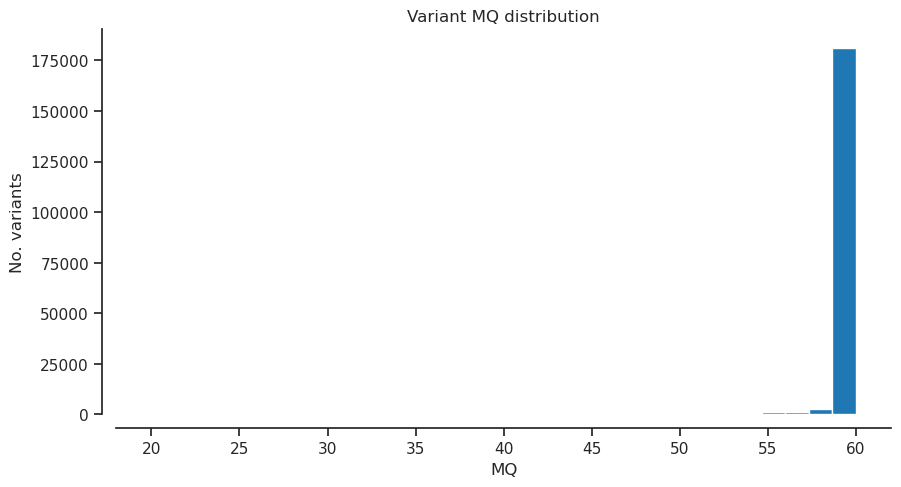

In [14]:
plot_hist('MQ','var') # RMS mapping quality

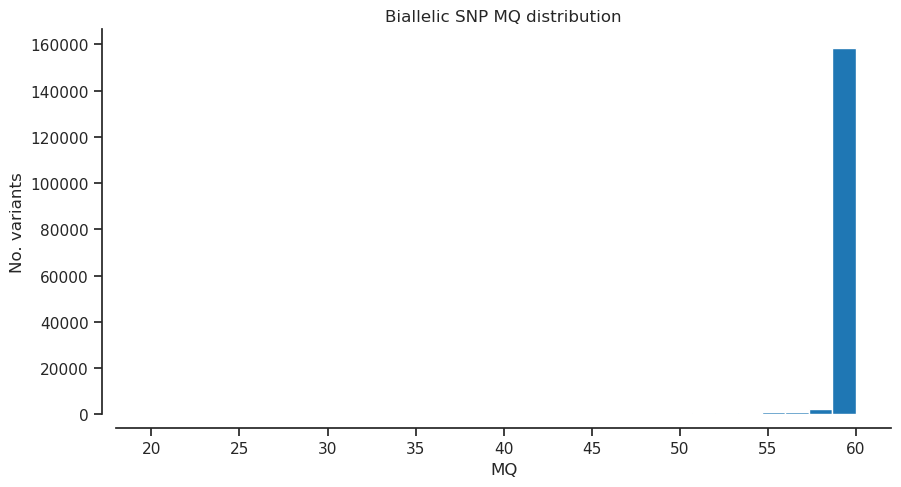

In [15]:
plot_hist('MQ','biallelic') # RMS mapping quality

In [16]:
filter_expression = '(MQ < 55)'
bi_selection = biallelic_np.query(filter_expression)[:]
#np.count_nonzero(var_selection)

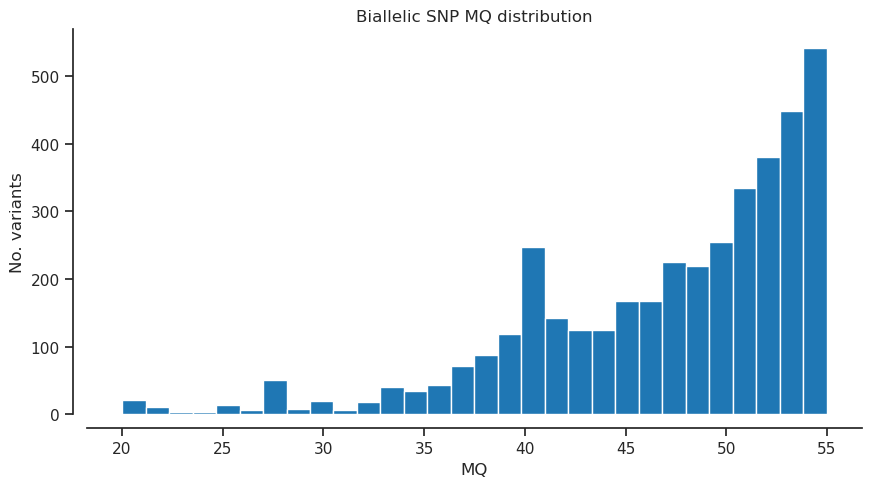

In [17]:
plot_hist('MQ')

In [18]:
filter_expression = '(MQ < 40)'
bi_selection = biallelic_np.query(filter_expression)[:]

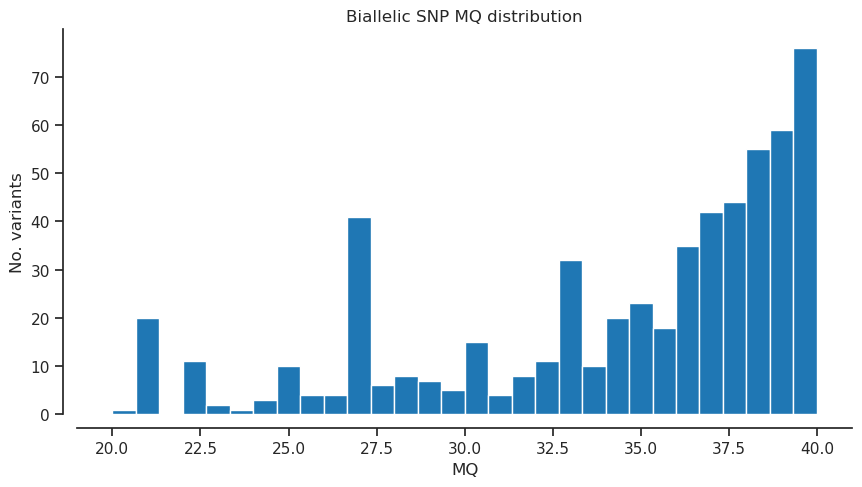

In [19]:
plot_hist('MQ')

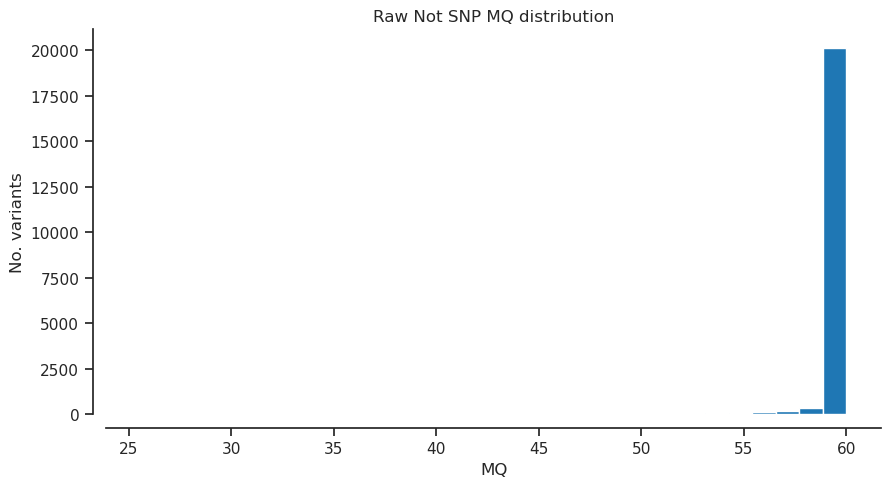

In [20]:
plot_hist('MQ','notsnp')

## QD - Variant Confidence/Quality by Depth

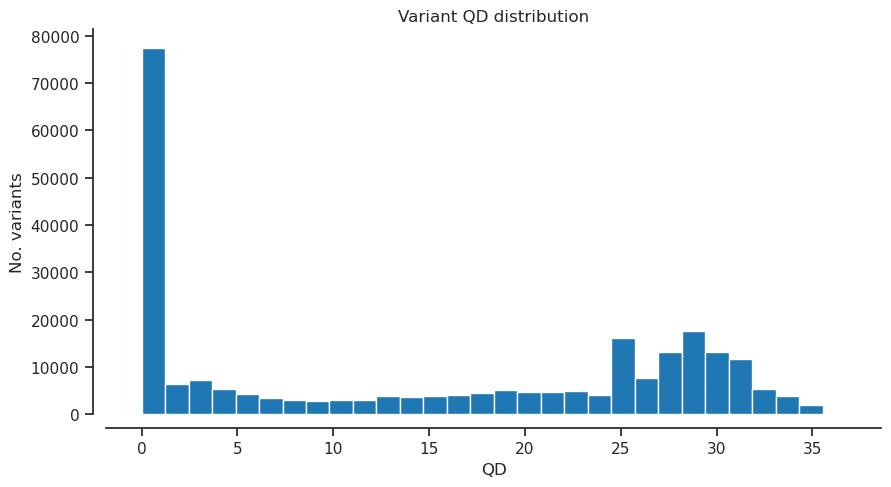

In [21]:
plot_hist('QD','var') # Variant Confidence/Quality by Depth

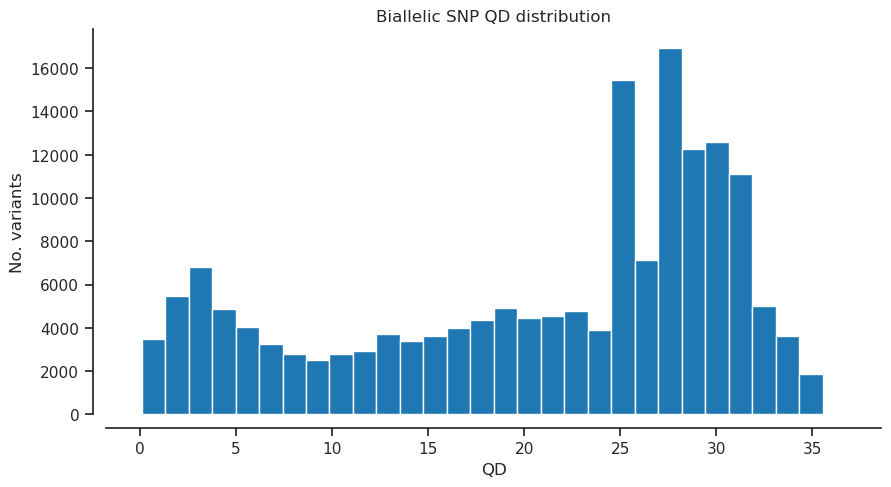

In [22]:
plot_hist('QD','biallelic') # Variant Confidence/Quality by Depth

In [23]:
filter_expression = '(QD < 2)'
bi_selection = biallelic_np.query(filter_expression)[:]

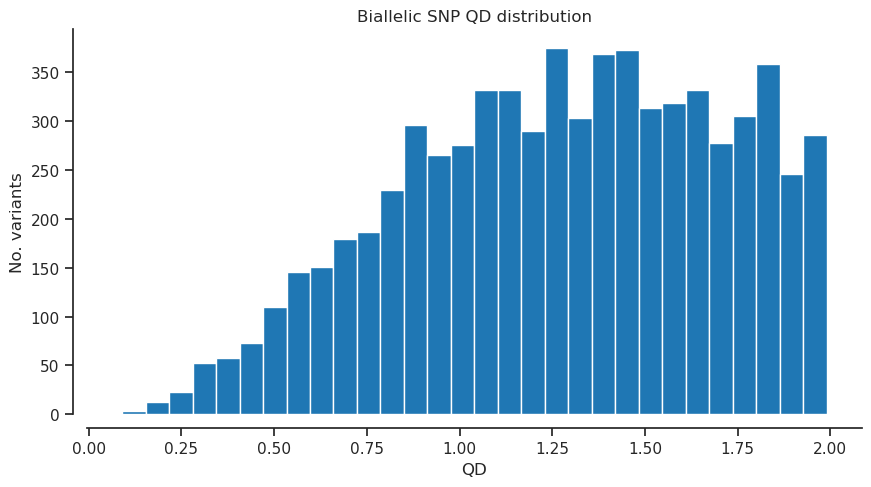

In [24]:
plot_hist('QD')

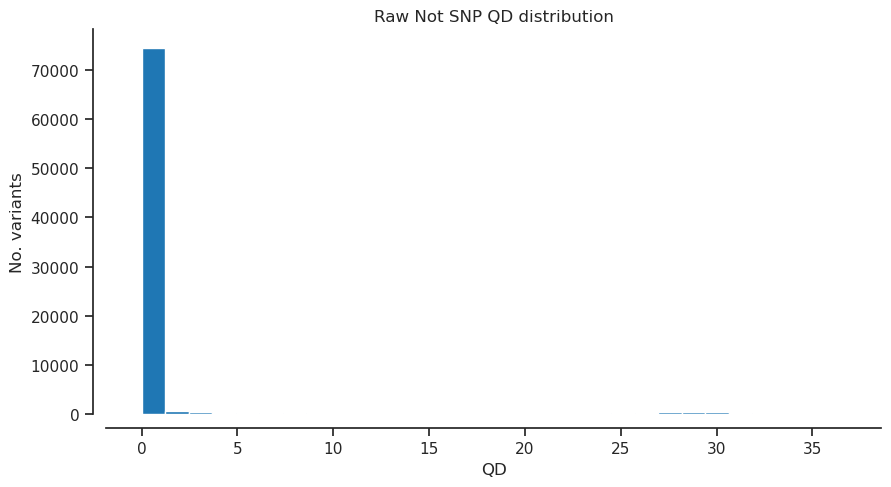

In [25]:
plot_hist('QD','notsnp') # Variant Confidence/Quality by Depth

## SOR - Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

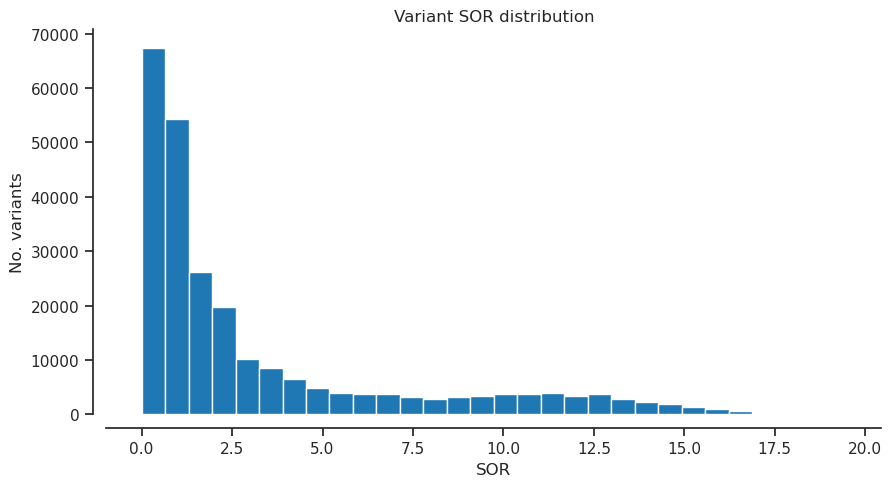

In [26]:
plot_hist('SOR', 'var') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

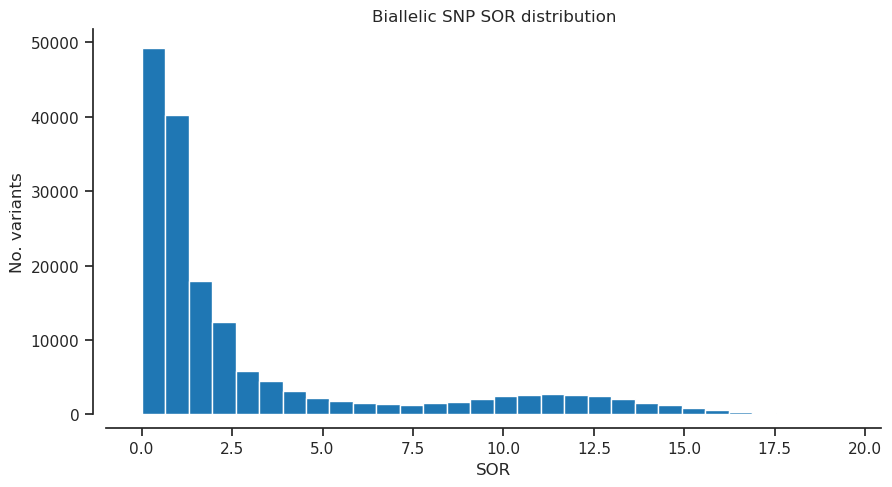

In [27]:
plot_hist('SOR','biallelic') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

In [28]:
filter_expression = '(SOR > 3)'
bi_selection = biallelic_np.query(filter_expression)[:]

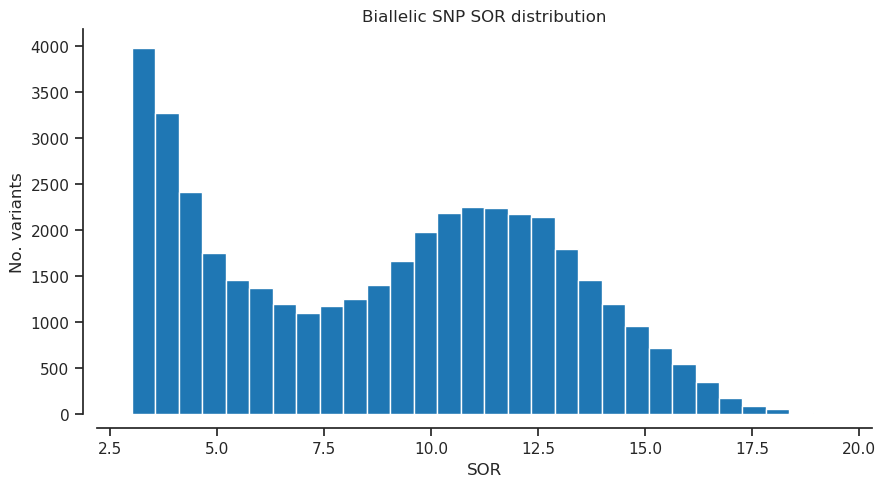

In [29]:
plot_hist('SOR') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

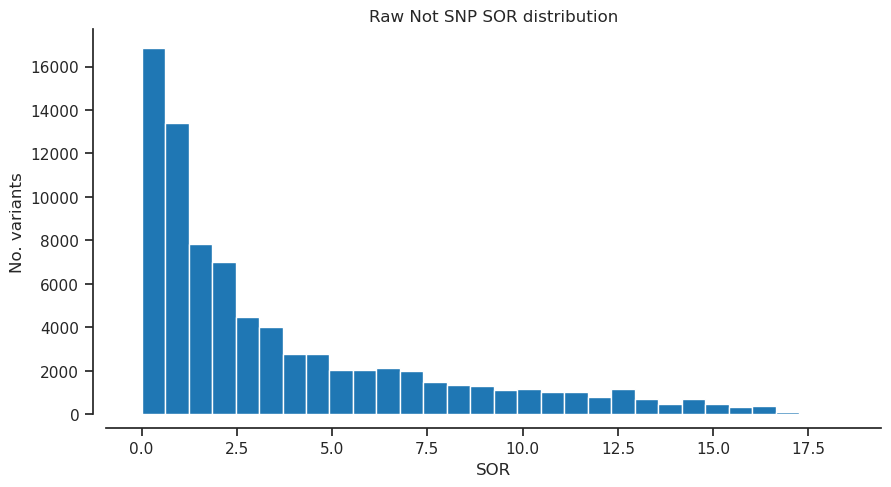

In [30]:
plot_hist('SOR','notsnp') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

## MQRankSum - Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

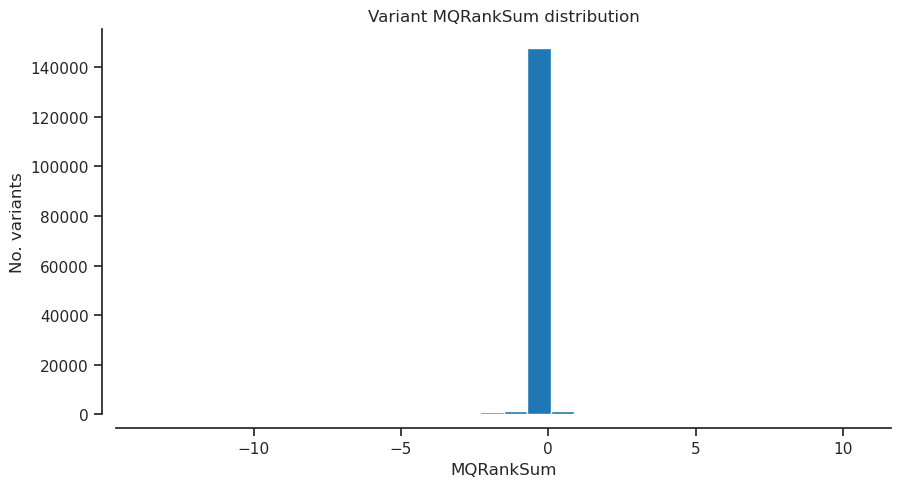

In [31]:
plot_hist('MQRankSum','var') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

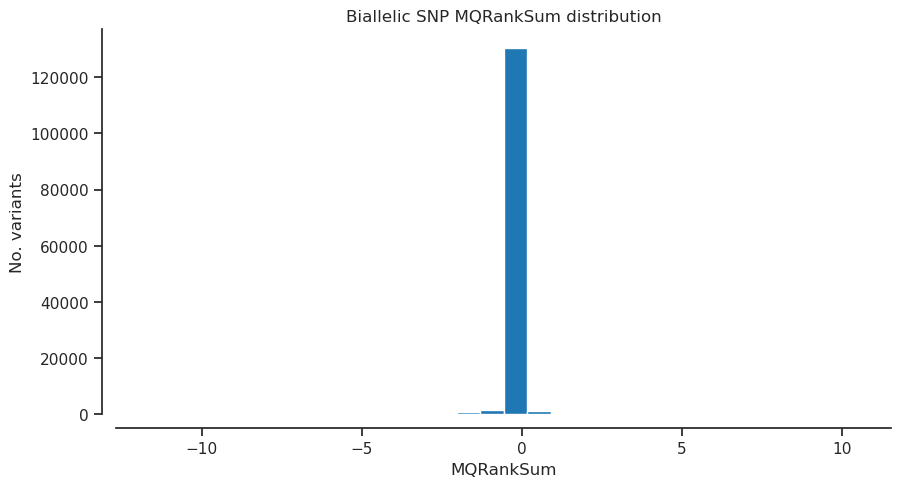

In [32]:
plot_hist('MQRankSum','biallelic') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

In [33]:
filter_expression = '(MQRankSum < -12.5)'
bi_selection = biallelic_np.query(filter_expression)[:]

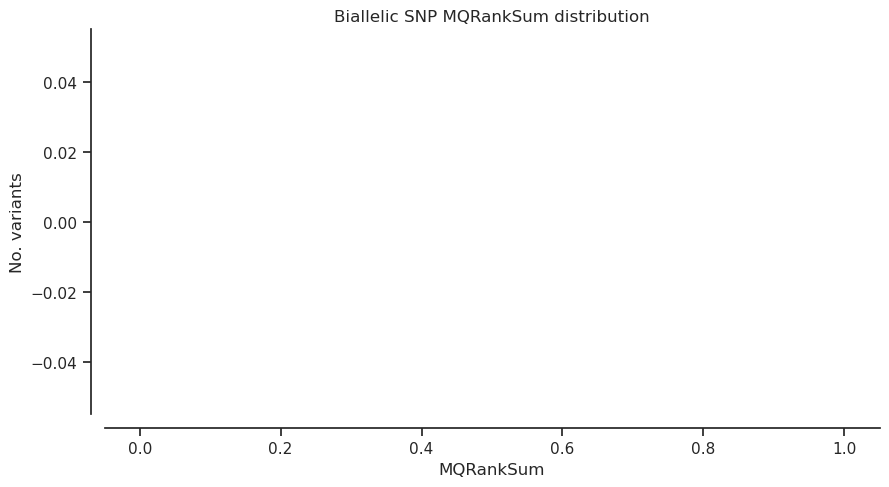

In [34]:
plot_hist('MQRankSum') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

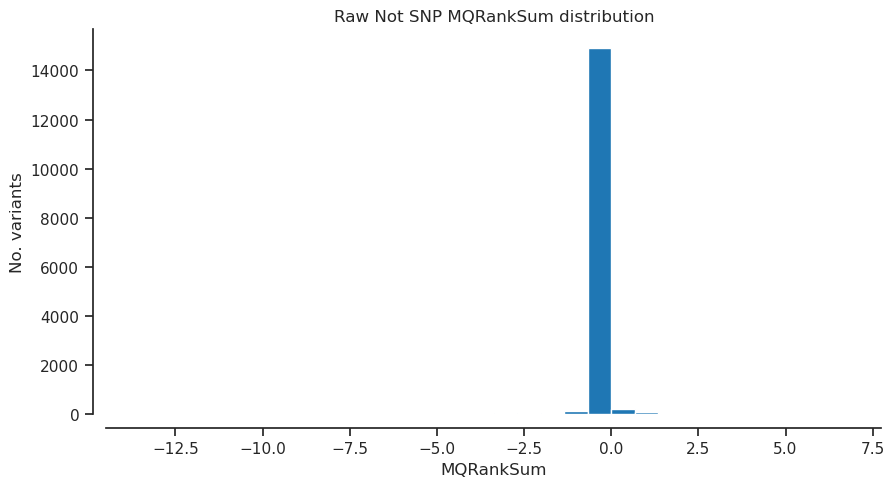

In [35]:
plot_hist('MQRankSum','notsnp') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

## ReadPosRankSum - Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

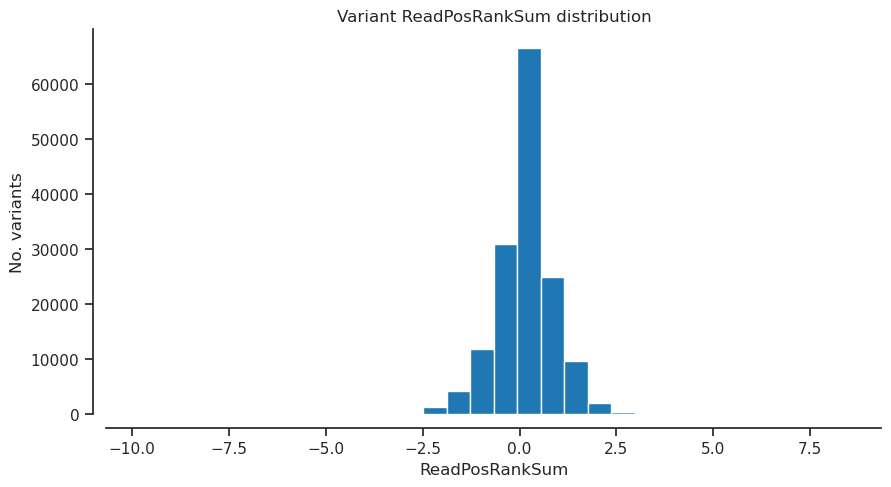

In [36]:
plot_hist('ReadPosRankSum','var') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

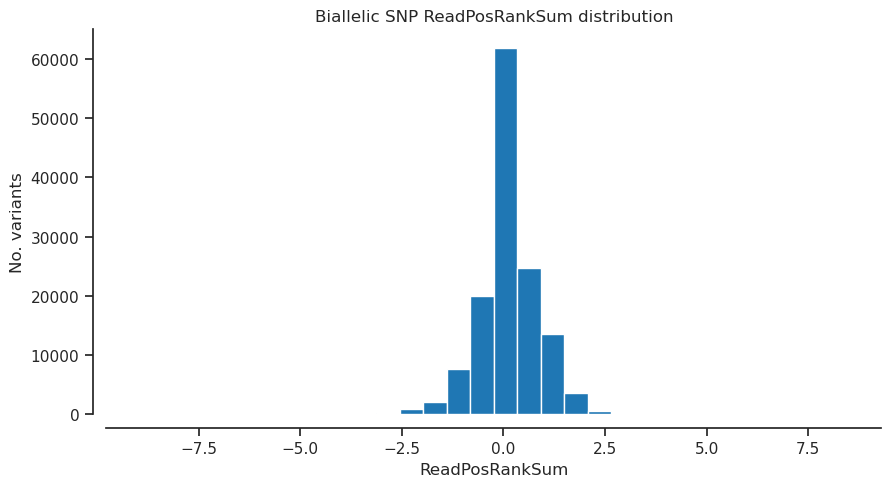

In [37]:
plot_hist('ReadPosRankSum','biallelic') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

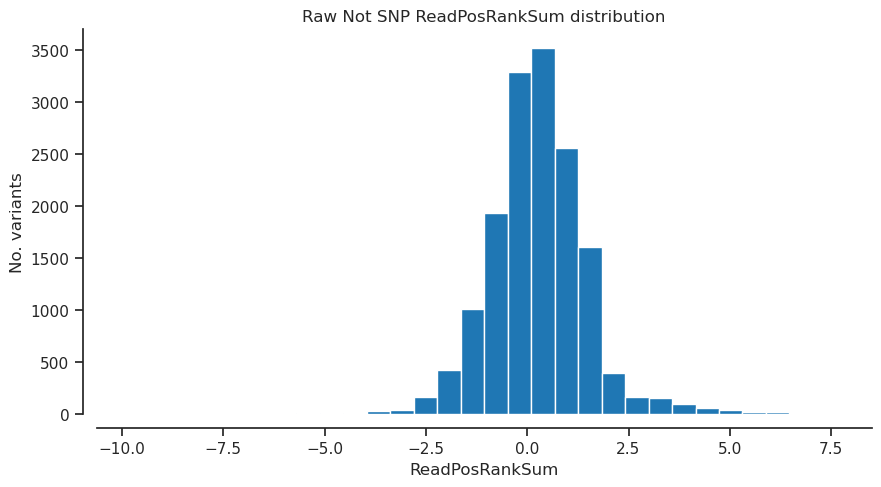

In [38]:
plot_hist('ReadPosRankSum','notsnp') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

## DP - Approximate read depth

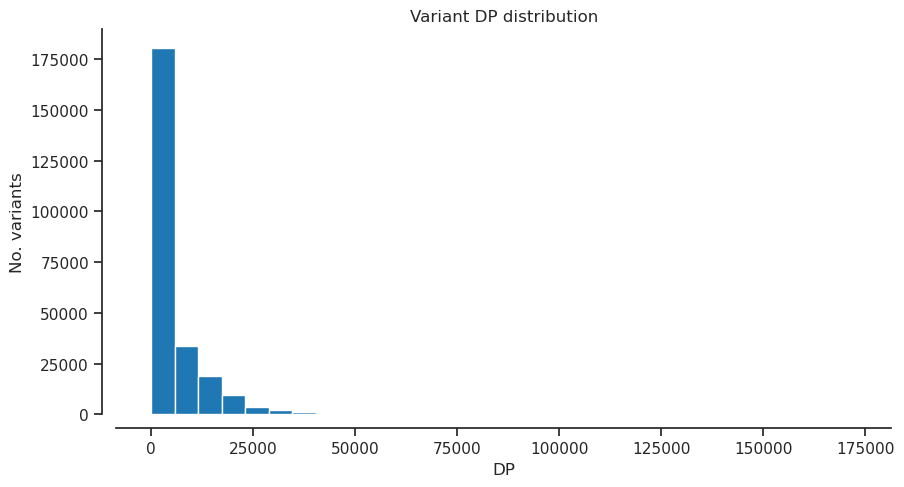

In [39]:
plot_hist('DP','var')

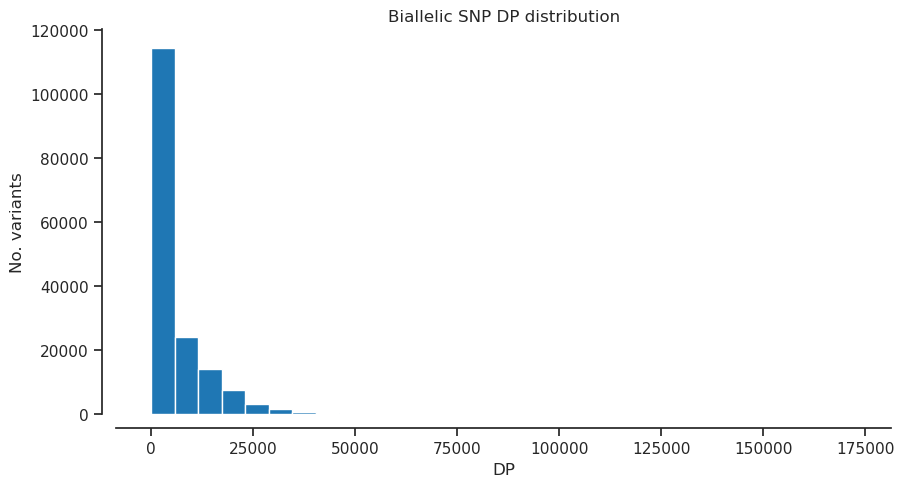

In [40]:
plot_hist('DP','biallelic')

In [41]:
filter_expression = '(DP > 20000) & (DP < 40000)'
bi_selection = biallelic_np.query(filter_expression)[:]

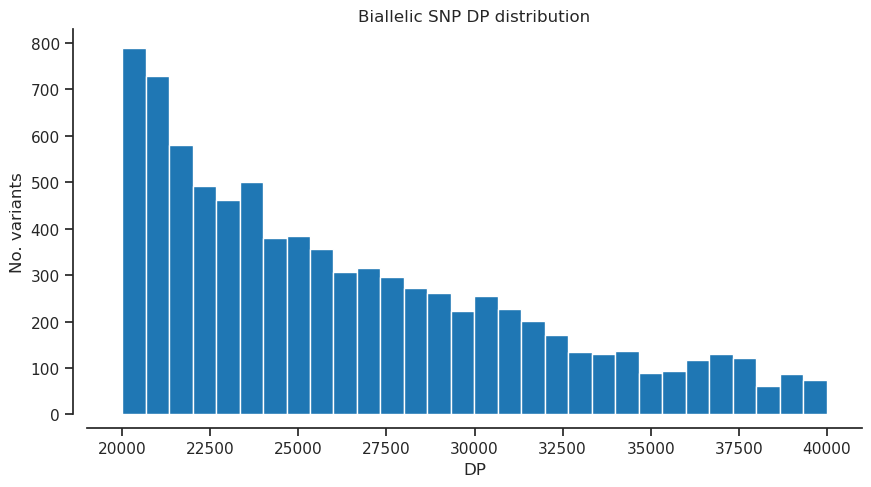

In [42]:
plot_hist('DP')

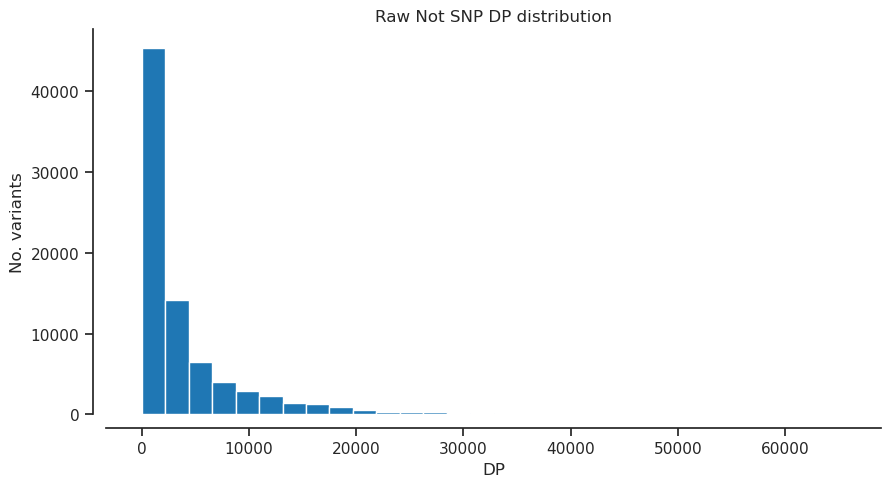

In [43]:
plot_hist('DP','notsnp')

## AN - Total number of alleles in called genotypes

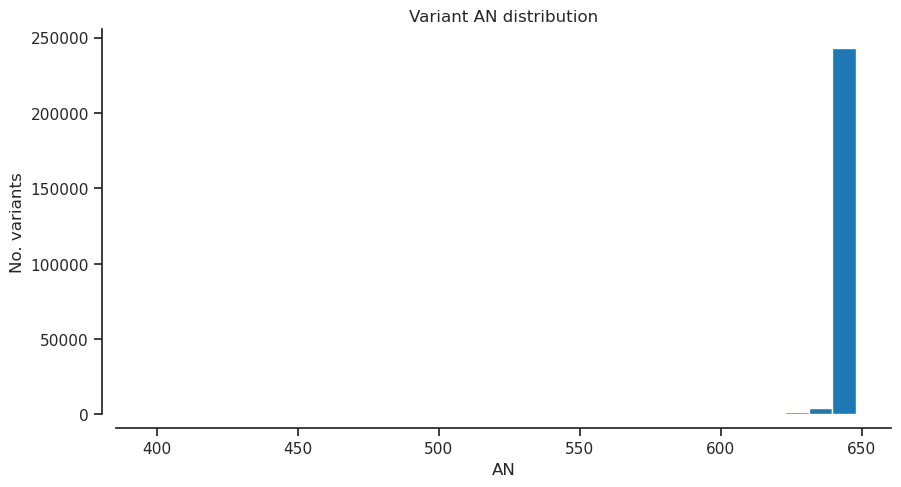

In [44]:
plot_hist('AN','var') # Total number of alleles in called genotypes

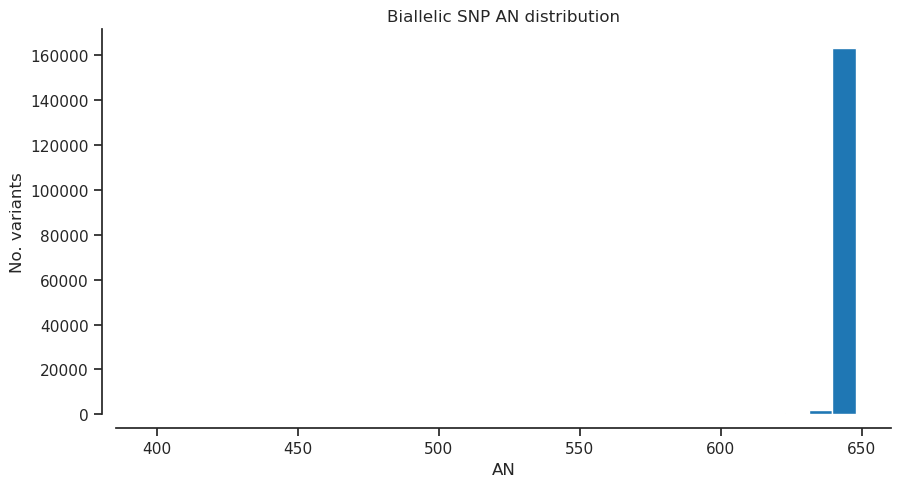

In [45]:
plot_hist('AN','biallelic') # Total number of alleles in called genotypes

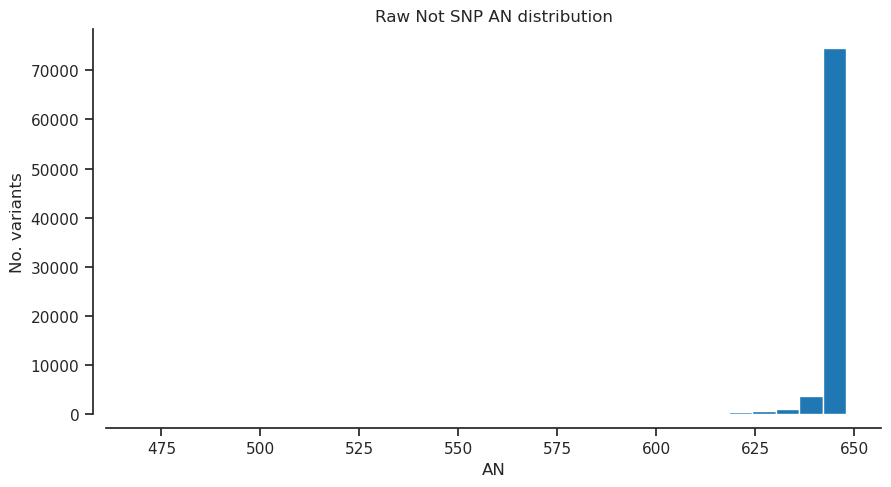

In [46]:
plot_hist('AN','notsnp') # Total number of alleles in called genotypes

## Selected filter

In [47]:
# QD: Variant Confidence/Quality by Depth
# AN: Total number of alleles in called genotypes
filter_expression = '(QD >= 2) & (MQ >= 40) & (MQRankSum >= -12.5) & (is_snp)'
variant_selection = variants_np.eval(filter_expression)[:]
np.count_nonzero(variant_selection)

131375

## Genotype

In [48]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [49]:
genotypes_var = allel.GenotypeChunkedArray(calldata_var['GT'])
genotypes_var

<GenotypeChunkedArray shape=(250287, 324, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=154.7M cbytes=10.8M cratio=14.3
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [50]:
# using the selected filters set above
gt_filtered_snps = genotypes_var.subset(variant_selection)
gt_filtered_snps

<GenotypeChunkedArray shape=(131375, 324, 2) dtype=int8 chunks=(2053, 324, 2)
   nbytes=81.2M cbytes=11.5M cratio=7.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [51]:
# grab the allele counts for the populations
ac = gt_filtered_snps.count_alleles()
ac

<AlleleCountsChunkedArray shape=(131375, 4) dtype=int32 chunks=(16422, 4)
   nbytes=2.0M cbytes=474.4K cratio=4.3
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [52]:
ac[:]

<AlleleCountsArray shape=(131375, 4) dtype=int32>
644   4   0   0
261 385   0   0
430 218   0   0
...
645   3   0   0
341 307   0   0
448 200   0   0

In [53]:
# Which ones are biallelic?
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

array([[644,   4],
       [261, 385],
       [430, 218],
       ...,
       [645,   3],
       [341, 307],
       [448, 200]], dtype=int32)

<Axes: xlabel='derived allele frequency', ylabel='site frequency'>

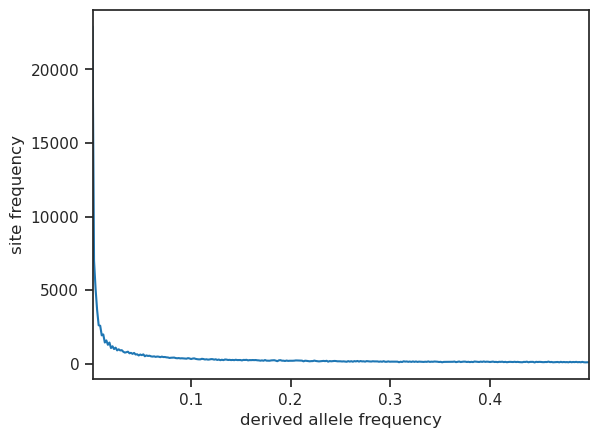

In [54]:
# plot the sfs of the derived allele
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

In [55]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites
biallelic

<ChunkedArrayWrapper shape=(131375,) dtype=bool chunks=(131375,)
   nbytes=128.3K cbytes=11.2K cratio=11.5
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [56]:
# select only the biallelic variants
gt_biallelic = gt_filtered_snps.compress(biallelic)
gt_biallelic

<GenotypeChunkedArray shape=(129012, 324, 2) dtype=int8 chunks=(2016, 324, 2)
   nbytes=79.7M cbytes=11.2M cratio=7.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [57]:
n_variants = len(gt_biallelic)
n_variants

129012

In [58]:
pc_missing = gt_biallelic.count_missing(axis=0)[:] * 100 / n_variants
pc_het = gt_biallelic.count_het(axis=0)[:] * 100 / n_variants

## Samples

In [59]:
samples_var = callset_var['samples']
samples_var = list(samples_var)
samples_var

[b'AUT00079-001',
 b'AUT00079-002',
 b'AUT00079-003',
 b'AUT00079-004',
 b'AUT00079-005',
 b'AUT00079-006',
 b'AUT00079-007',
 b'AUT00079-008',
 b'AUT00079-009',
 b'AUT00079-010',
 b'AUT00079-011',
 b'AUT00079-012',
 b'AUT00079-013',
 b'AUT00079-014',
 b'AUT00079-015',
 b'AUT00079-016',
 b'AUT00079-017',
 b'AUT00079-018',
 b'AUT00079-019',
 b'AUT00079-020',
 b'AUT00079-021',
 b'AUT00079-022',
 b'AUT00079-023',
 b'AUT00079-024',
 b'AUT00079-025',
 b'ESP00069-001',
 b'ESP00069-002',
 b'ESP00069-003',
 b'ESP00069-004',
 b'ESP00069-005',
 b'ESP00069-006',
 b'ESP00069-007',
 b'ESP00069-008',
 b'ESP00069-009',
 b'ESP00069-010',
 b'ESP00069-011',
 b'ESP00069-012',
 b'ESP00069-013',
 b'ESP00069-014',
 b'ESP00069-015',
 b'ESP00069-016',
 b'ESP00069-017',
 b'ESP00069-018',
 b'ESP00069-019',
 b'ESP00069-020',
 b'ESP00069-021',
 b'ESP00069-022',
 b'ESP00069-023',
 b'ESP00069-024',
 b'ESP00069-025',
 b'ESP00087-001',
 b'ESP00087-002',
 b'ESP00087-003',
 b'ESP00087-004',
 b'ESP00087-005',
 b'ESP0008

In [61]:
samples_fn = '~/scratch/data/Csativa/Castanea_sativa_list_scikit-allel.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,AUT00079-001,AUT00079
1,AUT00079-002,AUT00079
2,AUT00079-003,AUT00079
3,AUT00079-004,AUT00079
4,AUT00079-005,AUT00079
...,...,...
319,TUR00258-021,TUR00258
320,TUR00258-022,TUR00258
321,TUR00258-023,TUR00258
322,TUR00258-024,TUR00258


In [62]:
samples.Population.value_counts()

Population
AUT00079    25
ESP00069    25
ESP00287    25
ESP00379    25
ITA00274    25
TUR00100    25
ROU00146    25
TUR00057    25
TUR00075    25
TUR00218    25
TUR00125    25
TUR00258    25
ESP00087    24
Name: count, dtype: int64

In [63]:
populations = samples.Population.unique()
populations
###This identifiers come from the metadata file

array(['AUT00079', 'ESP00069', 'ESP00087', 'ESP00287', 'ESP00379',
       'ITA00274', 'ROU00146', 'TUR00057', 'TUR00075', 'TUR00100',
       'TUR00125', 'TUR00218', 'TUR00258'], dtype=object)

## Gt frequency function

In [64]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 13)
    pop2color = {'AUT00079': palette[0],
                 'ESP00069': palette[7],
                 'ESP00087': palette[1],
                 'ESP00287': palette[8],
                 'ESP00379': palette[2],
                 'ITA00274': palette[9],
                 'ROU00146': palette[3],
                 'TUR00057': palette[10],
                 'TUR00075': palette[4],
                 'TUR00100': palette[11],
                 'TUR00125': palette[5],
                 'TUR00218': palette[12],
                 'TUR00258': palette[6]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[6])]
    ax.legend(handles=handles, labels=['AUT00079', 'ESP00069', 'ESP00087', 'ESP00287', 'ESP00379',
       'ITA00274', 'ROU00146', 'TUR00057', 'TUR00075', 'TUR00100',
       'TUR00125', 'TUR00218', 'TUR00258'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

## Plot missing

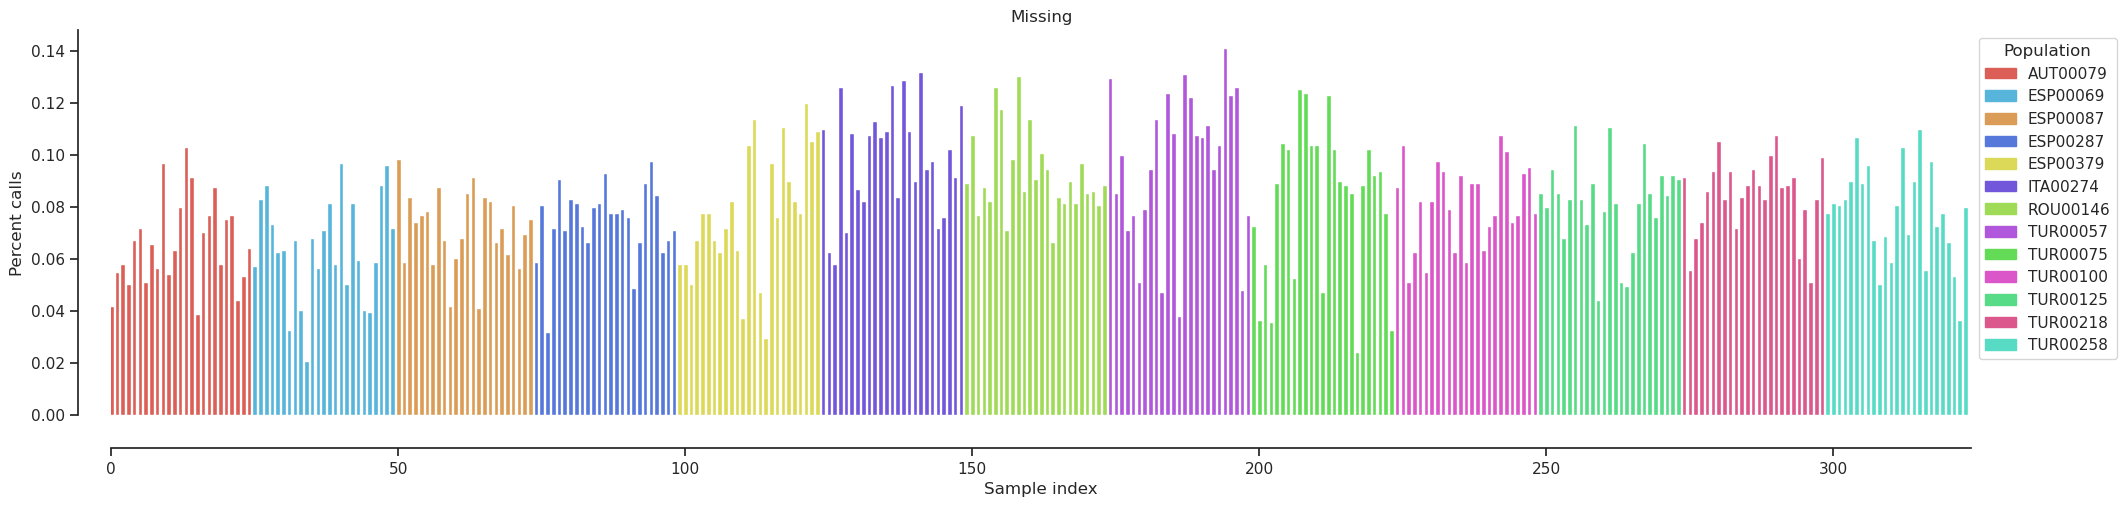

In [65]:
plot_genotype_frequency(pc_missing, 'Missing')

## Plot heterozygosity

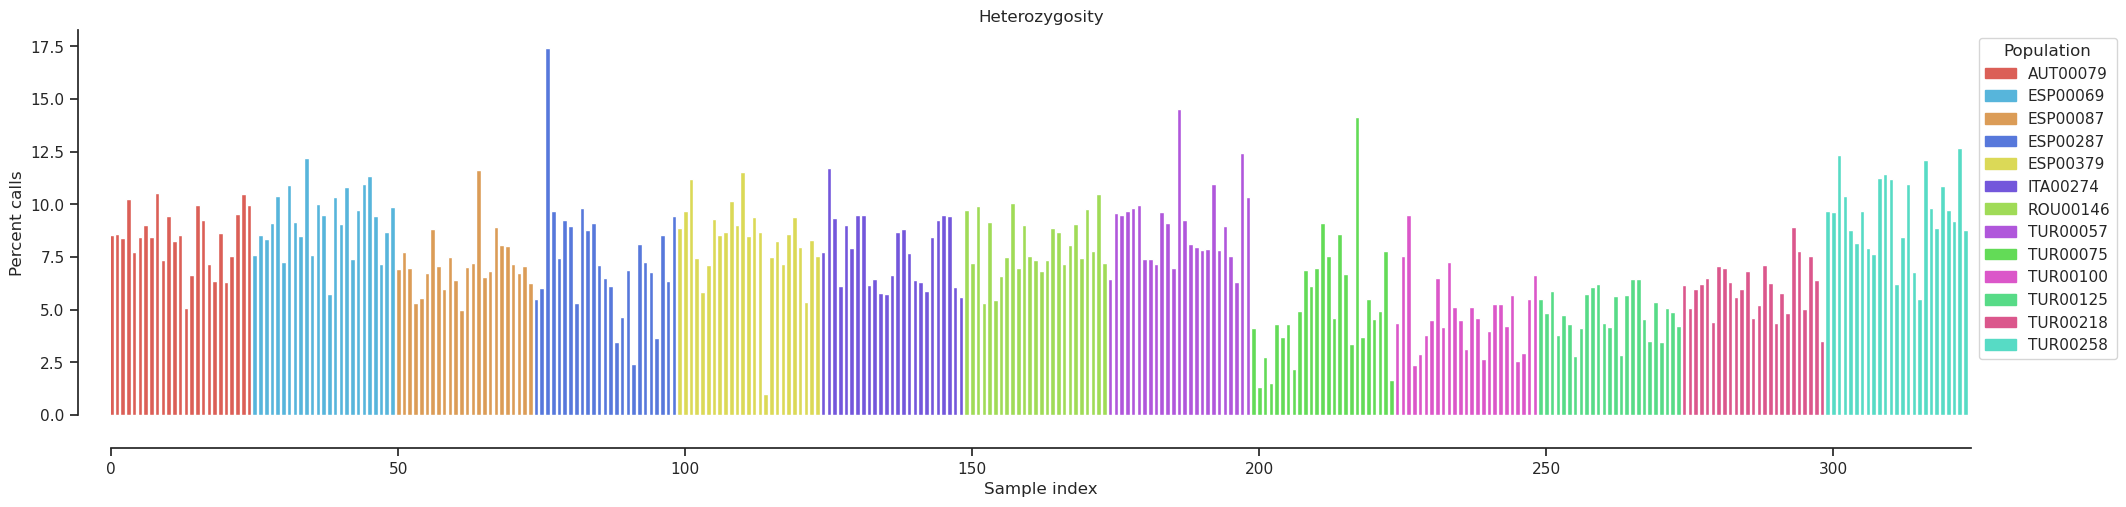

In [66]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

## PCA

In [73]:
palette = sns.color_palette("hls",13)
pop_colours = {    
                'AUT00079': palette[0],
                 'ESP00069': palette[7],
                 'ESP00087': palette[1],
                 'ESP00287': palette[8],
                 'ESP00379': palette[2],
                 'ITA00274': palette[9],
                 'ROU00146': palette[3],
                 'TUR00057': palette[10],
                 'TUR00075': palette[4],
                 'TUR00100': palette[11],
                 'TUR00125': palette[5],
                 'TUR00218': palette[12],
                 'TUR00258': palette[6]
}

In [74]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [75]:
ac2 = gt_biallelic.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(129012, 2) dtype=int32 chunks=(32253, 2)
   nbytes=1007.9K cbytes=354.0K cratio=2.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [76]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = gt_biallelic.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(105646, 324) dtype=int8 chunks=(3302, 324)
   nbytes=32.6M cbytes=7.1M cratio=4.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [77]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

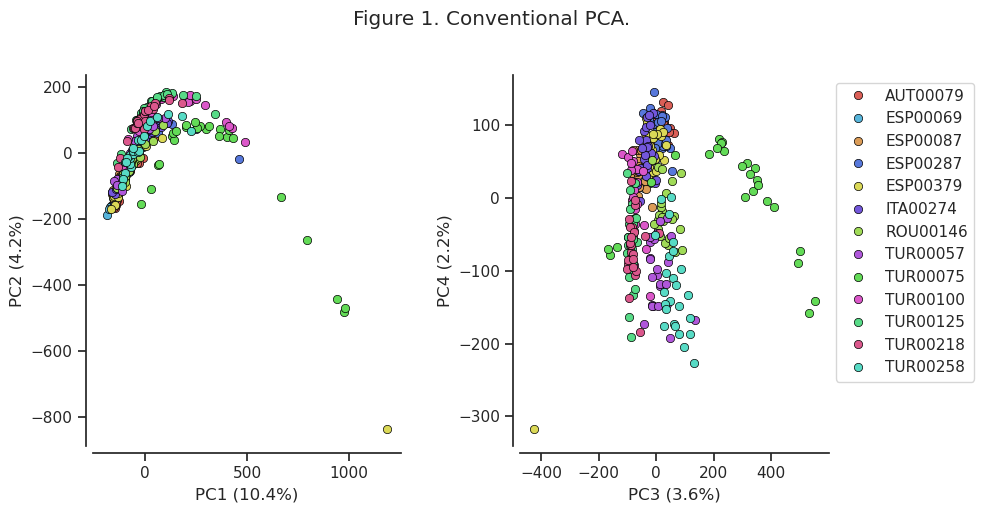

In [78]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [80]:
outliers = coords1[:,0]>1000
samples[outliers]

,ID,Population
114,ESP00379-016,ESP00379


In [81]:
pc_het[outliers]

array([0.99293089])

In [82]:
pc_missing[outliers]

array([0.02945462])